## Airline Analysis

In this project, we'll learn the ins and outs of airline prices for the travel agency. We want to make sure that we can find the best deal for our client and help them to understand how airline prices change based on different factors. The data include:
- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the data
flight = pd.read_csv("flight.csv")
print(flight.head())

   miles  passengers  delay inflight_meal inflight_entertainment  \
0    792         172      0            No                    Yes   
1   3163         214      0            No                    Yes   
2   1832         212      0            No                    Yes   
3    925         213      0            No                    Yes   
4    967         217      0           Yes                    Yes   

  inflight_wifi day_of_week redeye weekend  coach_price  firstclass_price  \
0           Yes      Sunday    Yes     Yes      338.820           1571.02   
1           Yes      Sunday     No     Yes      472.655           1663.70   
2            No      Friday     No     Yes      351.960           1429.86   
3           Yes    Saturday     No     Yes      387.835           1558.76   
4           Yes      Monday     No      No      374.735           1245.58   

   hours  
0      1  
1      6  
2      3  
3      2  
4      2  


### Univariate Analysis

The average price of a ticket is 376.585
The median price of a ticket is 380.56
The mimimum price is 44.415
The maximum price is 593.635


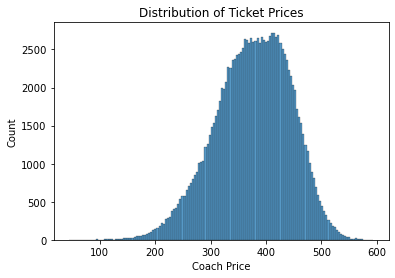

<Figure size 432x288 with 0 Axes>

In [44]:
# What would be considered the average?
print("The average price of a ticket is " + str(round(np.mean(flight.coach_price), 3)))
print("The median price of a ticket is " + str(np.median(flight.coach_price)))

# What are the high and low values?
print("The mimimum price is " + str(np.min(flight.coach_price)))
print("The maximum price is " + str(np.max(flight.coach_price)))

# What do coach ticket prices look like? Does $500 seem like a good price for a coach ticket?
sns.histplot(flight.coach_price)
plt.title("Distribution of Ticket Prices")
plt.xlabel("Count")
plt.xlabel("Coach Price")

plt.show()
plt.clf()

The average price of a ticket is 431.834
The median price of a ticket is 437.115
The mimimum price is 44.415
The maximum price is 593.635


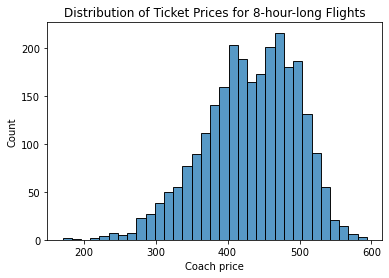

<Figure size 432x288 with 0 Axes>

In [45]:
# What are the high, low, and average prices for 8-hour-long flights?
print("The average price of a ticket is " + str(round(np.mean(flight.coach_price[flight.hours == 8]), 3)))
print("The median price of a ticket is " + str(np.median(flight.coach_price[flight.hours == 8])))

# What are the high and low values?
print("The mimimum price is " + str(np.min(flight.coach_price)))
print("The maximum price is " + str(np.max(flight.coach_price)))

# Does a $500 dollar ticket seem more reasonable than before?
sns.histplot(flight.coach_price[flight.hours == 8])
plt.title("Distribution of Ticket Prices for 8-hour-long Flights")
plt.xlabel("Count")
plt.xlabel("Coach price")

plt.show()
plt.clf()


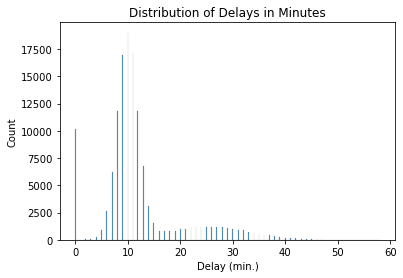

<Figure size 432x288 with 0 Axes>

In [46]:
# How often there are large delays? What kinds of delays are typical?
sns.histplot(flight.delay[flight.delay <= 500])
plt.title("Distribution of Delays in Minutes")
plt.xlabel("Count")
plt.xlabel("Delay (min.)")

plt.show()
plt.clf()

### Bivariate Analysis

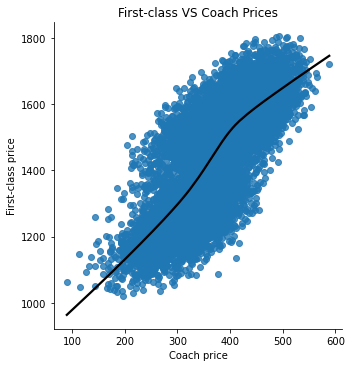

<Figure size 432x288 with 0 Axes>

In [47]:
# What is the relationship between coach and first-class prices?
perc = 0.1
flight_sub = flight.sample(n = int(flight.shape[0]*perc))

# Do flights with higher coach prices always have higher first-class prices as well?
sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'black'}, lowess=True)
plt.title("First-class VS Coach Prices")
plt.xlabel("Coach price")
plt.ylabel("First-class price")

plt.show()
plt.clf()

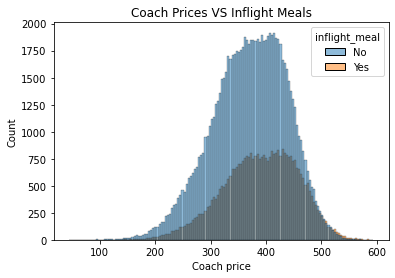

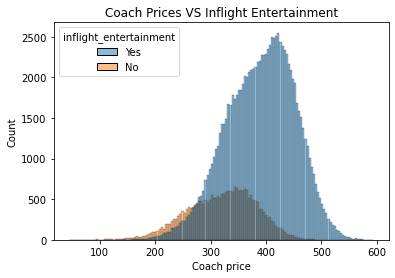

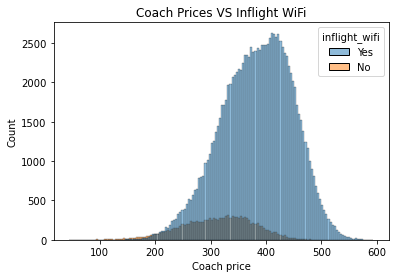

<Figure size 432x288 with 0 Axes>

In [48]:
# What is the relationship between coach prices and inflight features: inflight meal, inflight entertainment, and inflight WiFi? 
# Which features are associated with the highest increase in price?

# Inflight Meals
sns.histplot(flight, x = "coach_price", hue = flight.inflight_meal)
plt.title("Coach Prices VS Inflight Meals")
plt.xlabel("Coach price")
plt.ylabel("Count")

plt.show()
plt.clf()

# Inflight Entertainment
sns.histplot(flight, x = "coach_price", hue = flight.inflight_entertainment)
plt.title("Coach Prices VS Inflight Entertainment")
plt.xlabel("Coach price")
plt.ylabel("Count")

plt.show()
plt.clf()

# Inflight WiFi
sns.histplot(flight, x = "coach_price", hue = flight.inflight_wifi)
plt.title("Coach Prices VS Inflight WiFi")
plt.xlabel("Coach price")
plt.ylabel("Count")

plt.show()
plt.clf()


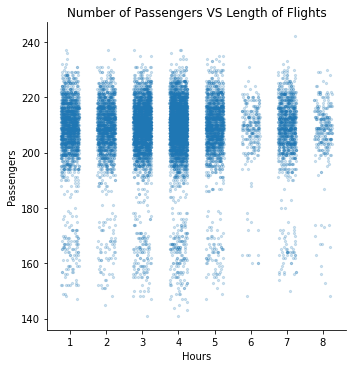

<Figure size 432x288 with 0 Axes>

In [49]:
# How does the number of passengers change in relation to the length of flights?
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.title("Number of Passengers VS Length of Flights")
plt.xlabel("Hours")
plt.ylabel("Passengers")
plt.show()
plt.clf()


### Multivariate Analysis

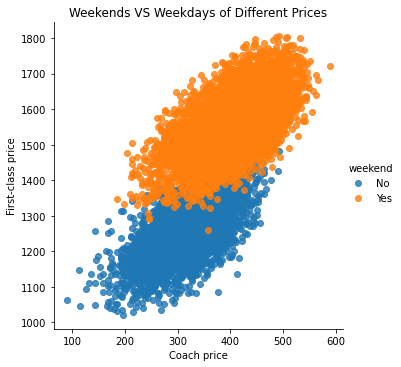

<Figure size 432x288 with 0 Axes>

In [50]:
# What is the relationship between coach and first-class prices on weekends compared to weekdays?
sns.lmplot(x = "coach_price", y = "firstclass_price", hue = "weekend", data = flight_sub, fit_reg=False)
plt.title("Weekends VS Weekdays of Different Prices")
plt.xlabel("Coach price")
plt.ylabel("First-class price")

plt.show()
plt.clf()


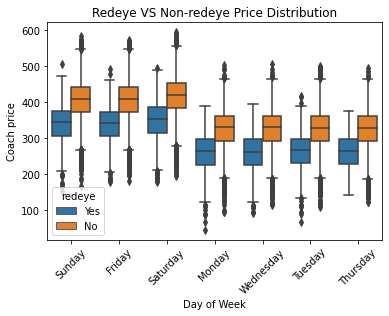

<Figure size 432x288 with 0 Axes>

In [51]:
# How do coach prices differ for redeyes and non-redeyes on each day of the week?
sns.boxplot(x = "day_of_week", y = "coach_price", hue = "redeye", data = flight)
plt.title("Redeye VS Non-redeye Price Distribution")
plt.xlabel("Day of Week")
plt.ylabel("Coach price")
plt.xticks(rotation=45)

plt.show()
plt.clf()